In [ ]:
import json
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Plot annotations and bounding boxes

After creating the dataset using `python dataset.py` one can use this notebook to get to know the dataset better and to plot the bounding boxes. 

NOTE: Remember to edit `annotation_path` and `img_path`

In [47]:
annotation_path = "/home/taheera.ahmed/data/reindeerdrone/tiles/new_annotations.json"
img_path = "/home/taheera.ahmed/data/reindeerdrone/tiles"

In [17]:
with open(annotation_path, 'r') as file:
    data = json.load(file)
annotations = data

images = data['images']
annotations = data['annotations']
categories = {cat['id']: cat['name'] for cat in data['categories']}

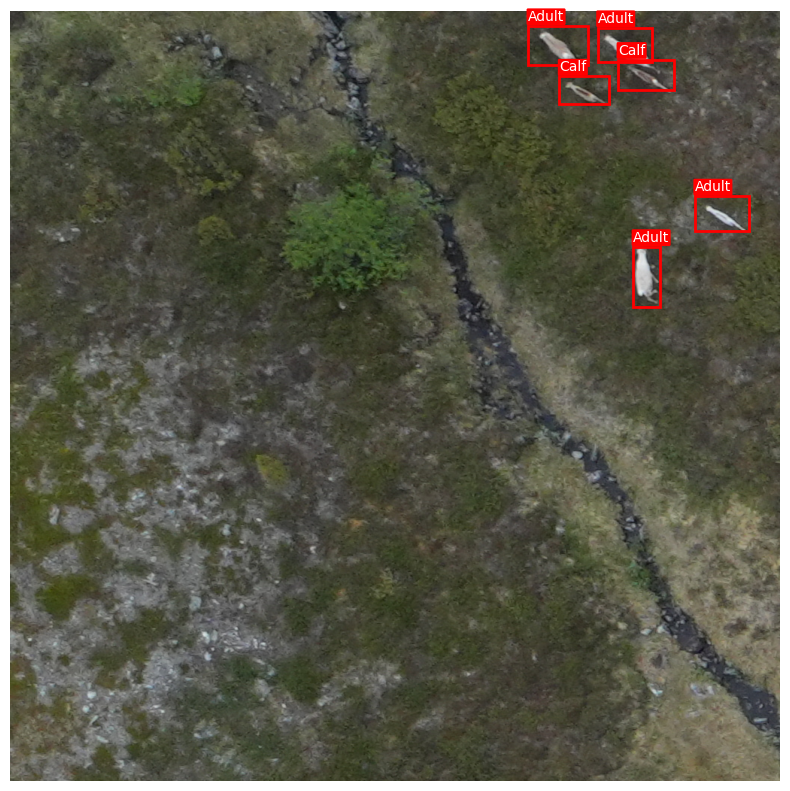

Number of bounding boxes in image DSC00408_tile1.png: 6
Number of bounding boxes in image DSC00408_tile1.png: 6


In [61]:
def plot_image_annotations(img_path, image_info, annotations, categories):
    # Load the image
    image_path = f"{img_path}/{image_info['file_name']}"  # Adjust the path
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)
    
    # Initialize bounding box counter
    bbox_count = 0
    
    # Find and plot annotations for this image
    for anno in annotations:
        if anno['image_id'] == image_info['file_name']:
            x, y, width, height = anno['bbox']
            # Clip the bounding box to the image boundaries
            x_end = min(x + width, image.shape[1])
            y_end = min(y + height, image.shape[0])
            width = x_end - x
            height = y_end - y

            # Ensure bounding box is within the image
            if x >= 0 and y >= 0 and x_end <= image.shape[1] and y_end <= image.shape[0]:
                rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
                
                # Increment the bounding box counter
                bbox_count += 1
                
                # Optional: Add text label for each bbox
                label = categories.get(anno['category_id'], 'Unknown')
                # Place label above the bounding box, outside it
                label_x = x
                label_y = y - 3  # Slight vertical offset from the top of the bbox
                if label_y < 0:  # If the label goes above the image, adjust it to be just at the top inside the bbox
                    label_y = y + 3
                
                ax.text(label_x, label_y, label, color='white', fontsize=10, verticalalignment='bottom',
                        bbox=dict(facecolor='red', edgecolor='none', boxstyle='round,pad=0.1'))
    
    ax.set_axis_off()
    plt.show()
    

    ax.set_axis_off()
    plt.show()
    
    # Print the number of bounding boxes
    print(f"Number of bounding boxes in image {image_info['file_name']}: {bbox_count}")

    ax.set_axis_off()
    plt.show()
    
    # Print the number of bounding boxes
    print(f"Number of bounding boxes in image {image_info['file_name']}: {bbox_count}")




# Loop through a subset of images to plot them with annotations
for image_info in images[1:2]:  # Adjust the slice to limit the number of images processed
    plot_image_annotations(img_path, image_info, annotations, categories)
